In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as st

In [2]:
column_name=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capitl_loss","hours_per_week","native_country","salary"]

In [3]:
dataset1=pd.read_csv("adult.csv",names=column_name,header=None)
dataset2=pd.read_csv("adult1.csv",names=column_name,header=None)

In [4]:
dataset1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capitl_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capitl_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
dataset=pd.concat([dataset1,dataset2])
dataset.reset_index(inplace=True)

In [7]:
dataset.drop("index",axis=1,inplace=True)

In [8]:
dataset.shape

(48842, 15)

In [9]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capitl_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [10]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capitl_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
dataset.salary.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: salary, dtype: int64

In [12]:
dataset[dataset.duplicated()].shape

(29, 15)

In [13]:
dataset.drop_duplicates(inplace=True)

In [14]:
dataset[dataset.duplicated()].shape

(0, 15)

In [15]:
dataset["salary"]=dataset["salary"].str.replace("<=50K.","<=50K",regex=True)
dataset["salary"]=dataset["salary"].str.replace(">50K.",">50K",regex=True)

In [16]:
dataset.salary.value_counts()

 <=50K    37128
 >50K     11685
Name: salary, dtype: int64

In [17]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capitl_loss       0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [18]:
for feature in dataset.columns:
    print("Feature {} has these {} unique value\n".format(feature,dataset[feature].unique()))

Feature age has these [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] unique value

Feature workclass has these [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] unique value

Feature fnlwgt has these [ 77516  83311 215646 ... 173449  89686 350977] unique value

Feature education has these [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] unique value

Feature education_num has these [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] unique value

Feature marital_status has these [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education_num   48813 non-null  int64 
 5   marital_status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital_gain    48813 non-null  int64 
 11  capitl_loss     48813 non-null  int64 
 12  hours_per_week  48813 non-null  int64 
 13  native_country  48813 non-null  object
 14  salary          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


# Numerical and Categorical Features

# 1.Categorical Features

In [20]:
cat=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [21]:
for feature in dataset.columns:
    print("Feature Name {}\n {}\n".format(feature,dataset[feature].value_counts()))

Feature Name age
 36    1348
35    1336
33    1335
23    1328
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

Feature Name workclass
  Private             33879
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

Feature Name fnlwgt
 203488    21
190290    19
120277    19
126569    18
125892    18
          ..
119913     1
78170      1
279721     1
390867     1
350977     1
Name: fnlwgt, Length: 28523, dtype: int64

Feature Name education
  HS-grad         15777
 Some-college    10869
 Bachelors        8020
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         

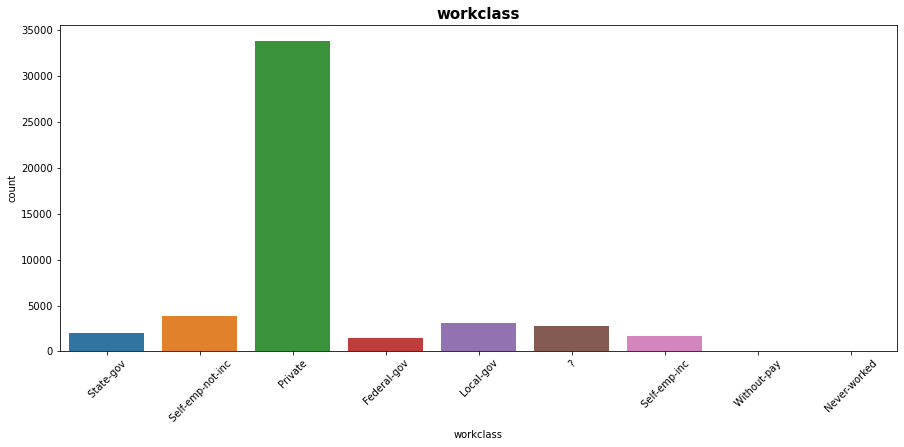

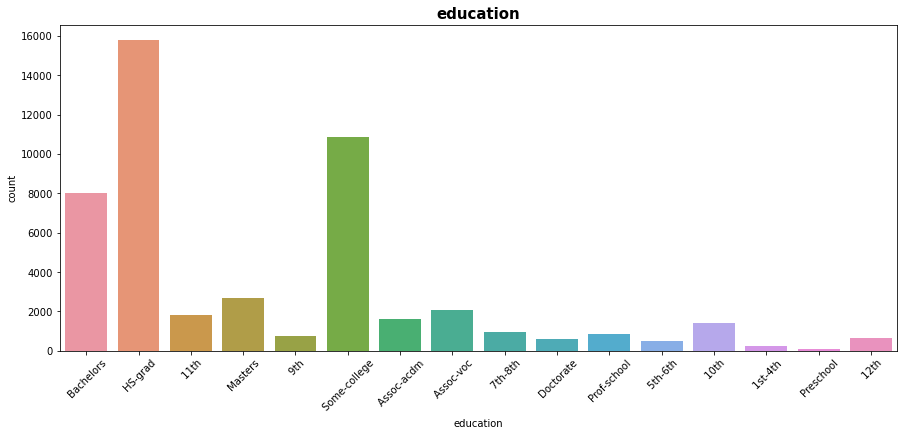

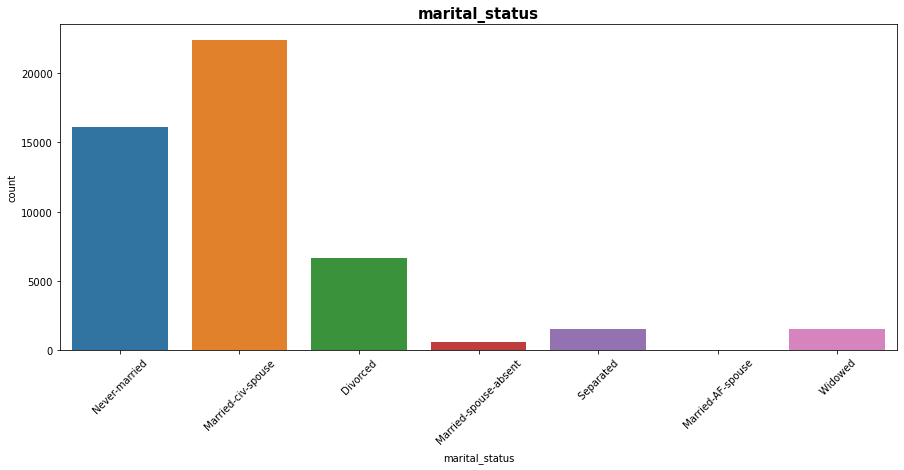

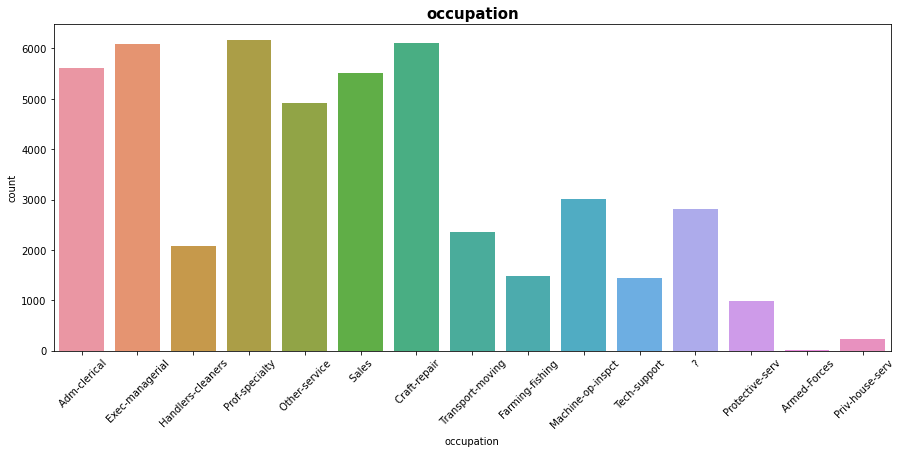

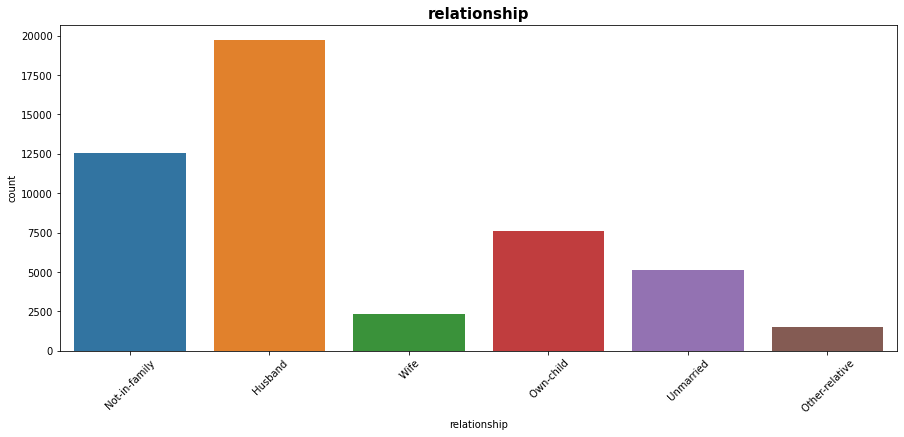

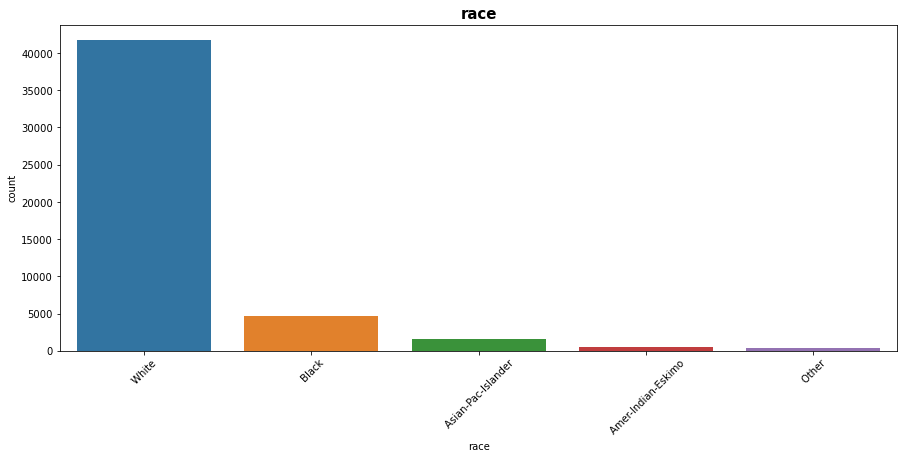

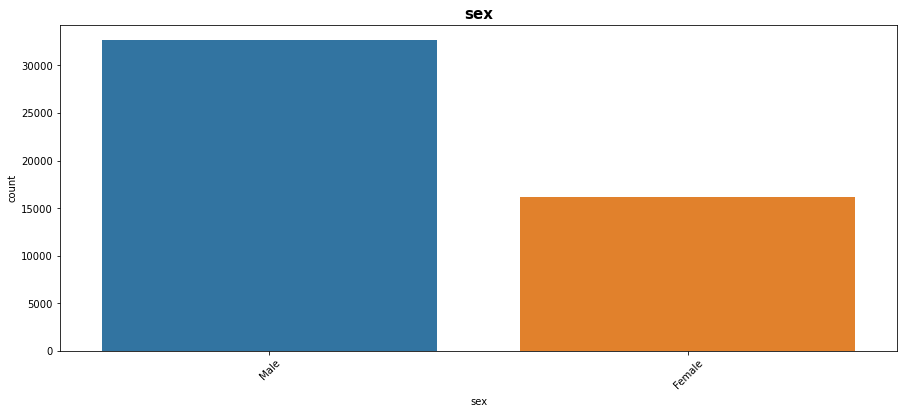

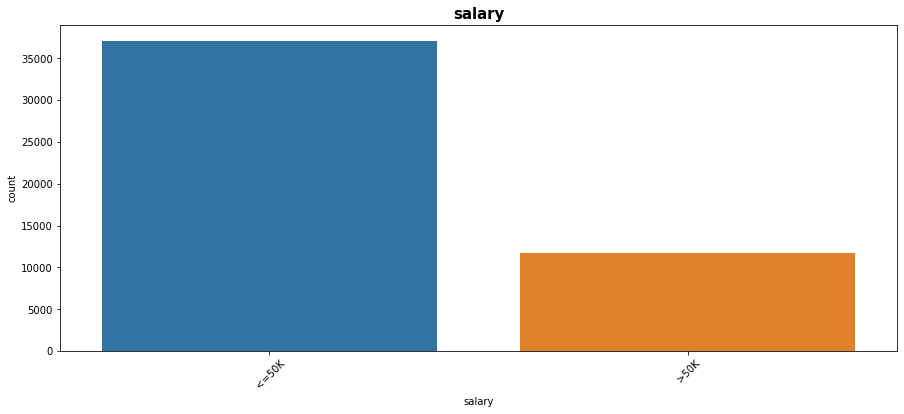

In [22]:
for feature in [feature for feature in cat if feature not in ["native_country"]]:
    plt.figure(figsize=(15,6))
    sns.countplot(data=dataset,x=feature)
    plt.title(feature,fontsize=15,weight="bold")
    plt.xticks(rotation=45)
    plt.show()

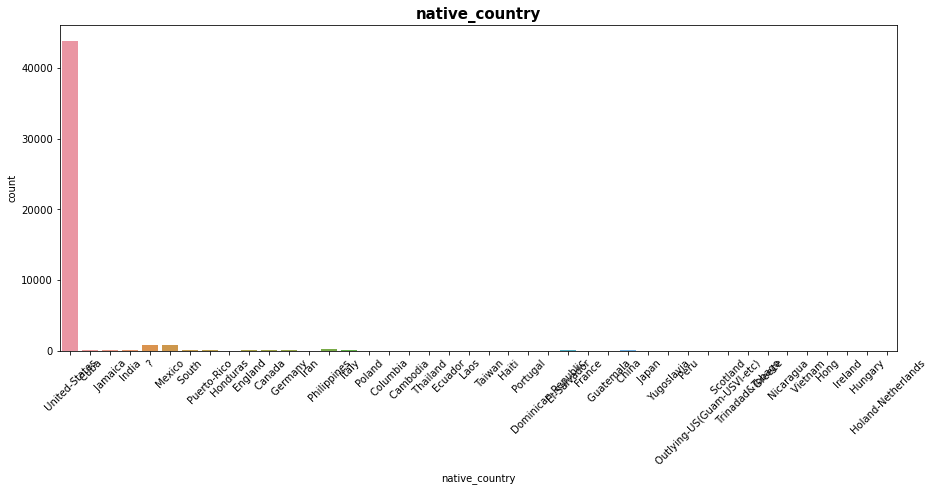

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data=dataset,x="native_country")
plt.title("native_country",fontsize=15,weight="bold")
plt.xticks(rotation=45)
plt.show()

In [24]:
num=[feature for feature in dataset.columns if feature not in cat]
num

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capitl_loss',
 'hours_per_week']

In [25]:
for feature in num:
    print("Feature '{}' has these {} no.of unique \n".format(feature,dataset[feature].nunique()))

Feature 'age' has these 74 no.of unique 

Feature 'fnlwgt' has these 28523 no.of unique 

Feature 'education_num' has these 16 no.of unique 

Feature 'capital_gain' has these 123 no.of unique 

Feature 'capitl_loss' has these 99 no.of unique 

Feature 'hours_per_week' has these 96 no.of unique 



# Discrete Features

In [26]:
discrete=[feature for feature in num if dataset[feature].nunique()<20]
discrete

['education_num']

# Countplot

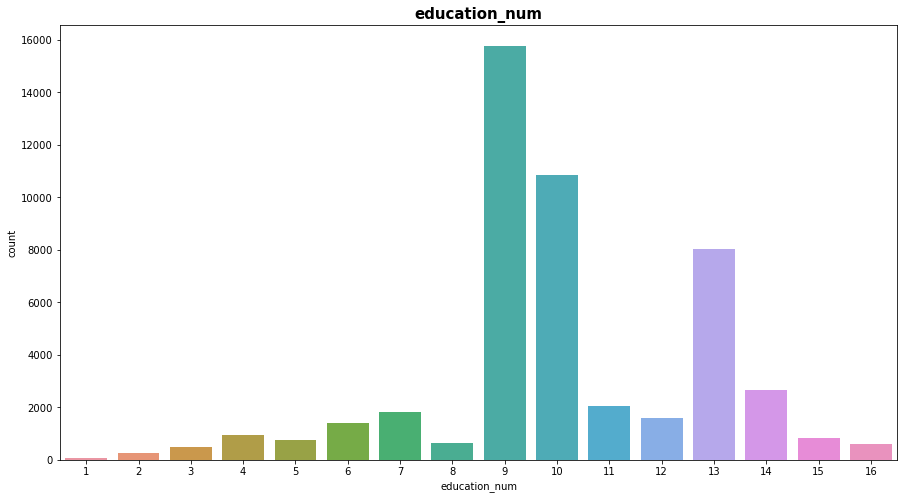

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data=dataset,x="education_num")
plt.title("education_num",fontsize=15,weight="bold")
plt.show()

In [28]:
cont=[feature for feature in num if feature not in discrete]
print(cont)

['age', 'fnlwgt', 'capital_gain', 'capitl_loss', 'hours_per_week']


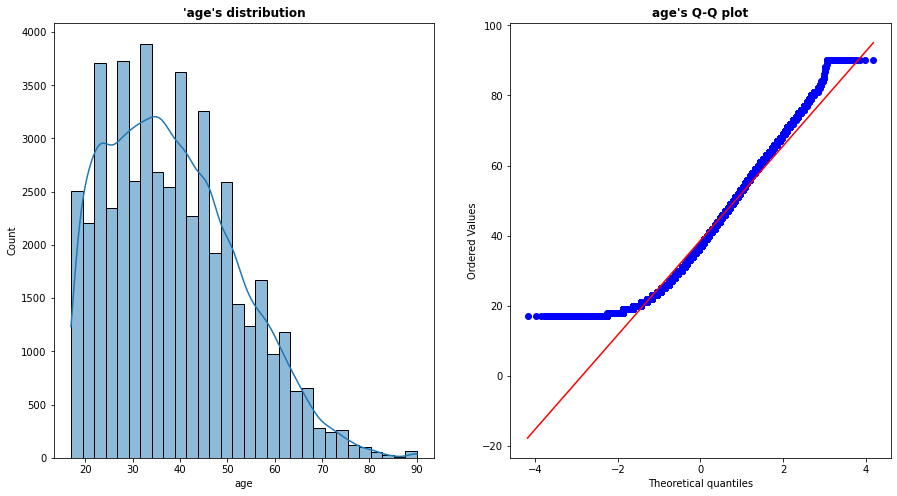

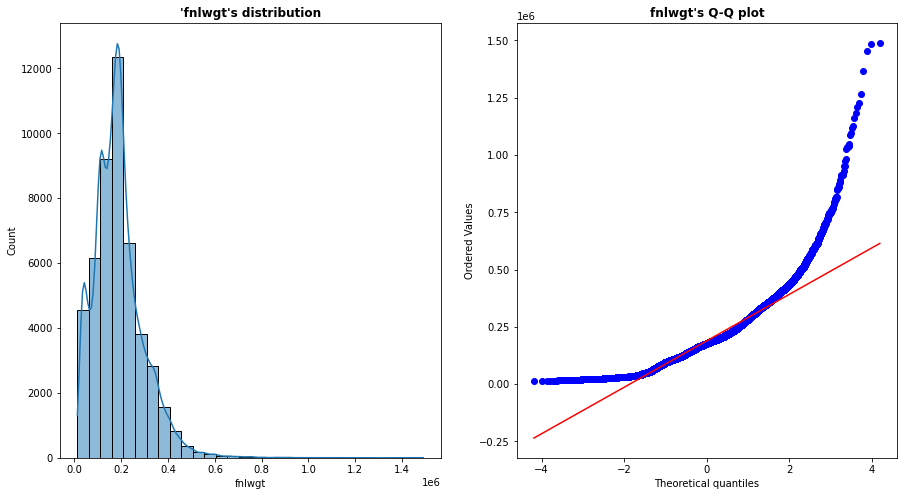

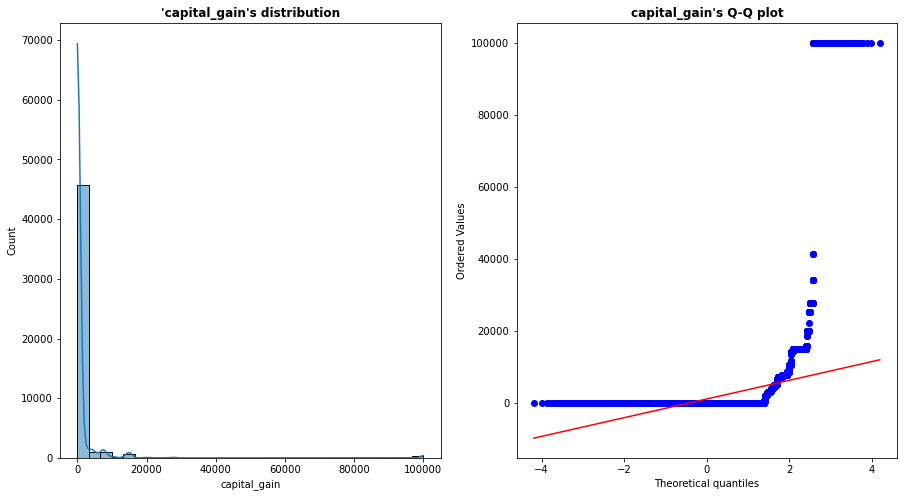

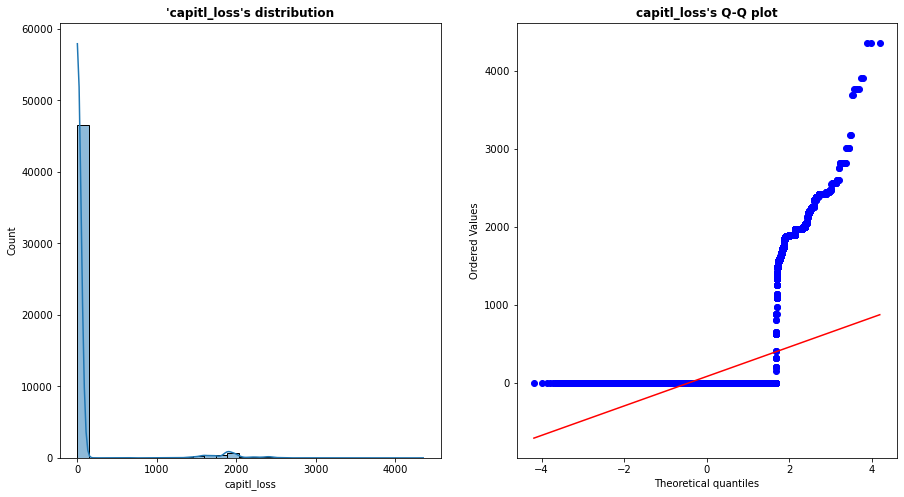

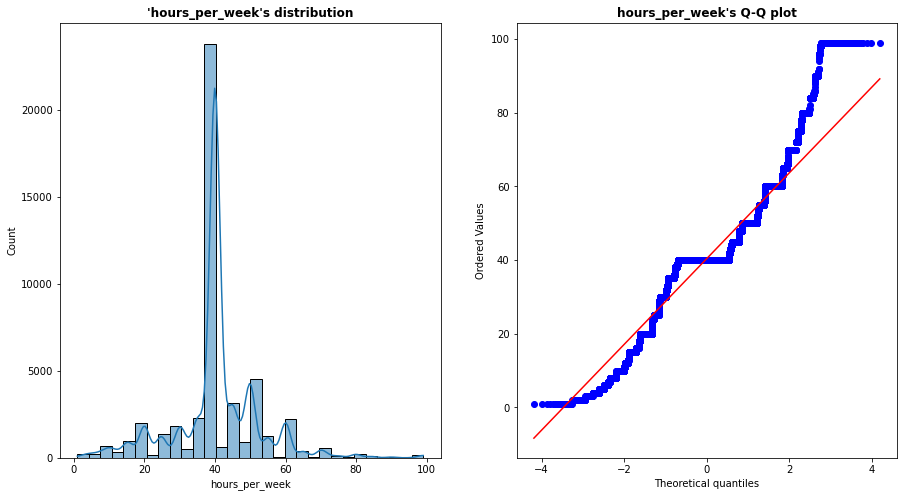

In [33]:
for i in cont:
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    sns.histplot(data=dataset,x=i,kde=True,bins=30)
    plt.title("'{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    st.probplot(dataset[i],dist="norm",plot=plt)
    plt.title("{}'s Q-Q plot".format(i),fontweight="bold")
    plt.show()

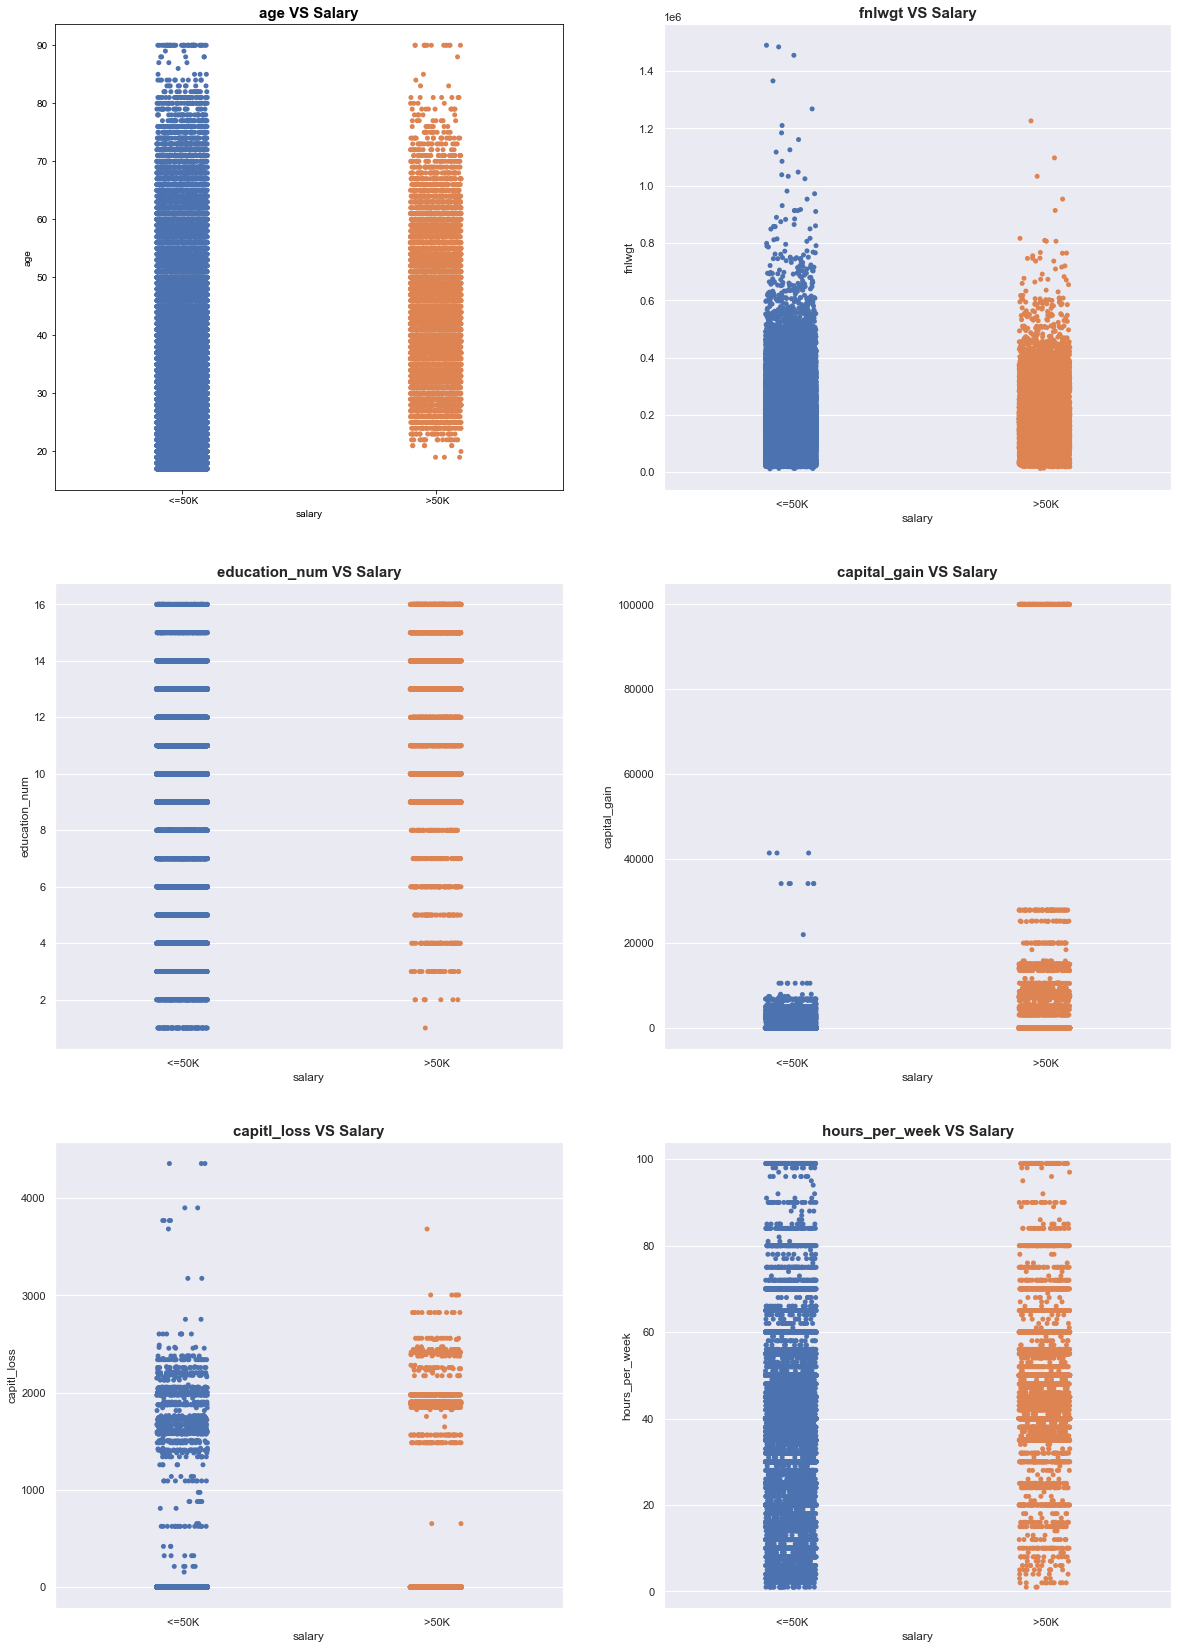

In [35]:
plt.figure(figsize=(20,60))
for i in enumerate(num):
    plt.subplot(6,2,i[0]+1)
    sns.set(rc={"figure.figsize":(8,10)})
    sns.stripplot(data=dataset,y=i[1],x="salary")
    plt.title("{} VS Salary".format(i[1]),fontsize=15,fontweight="bold")

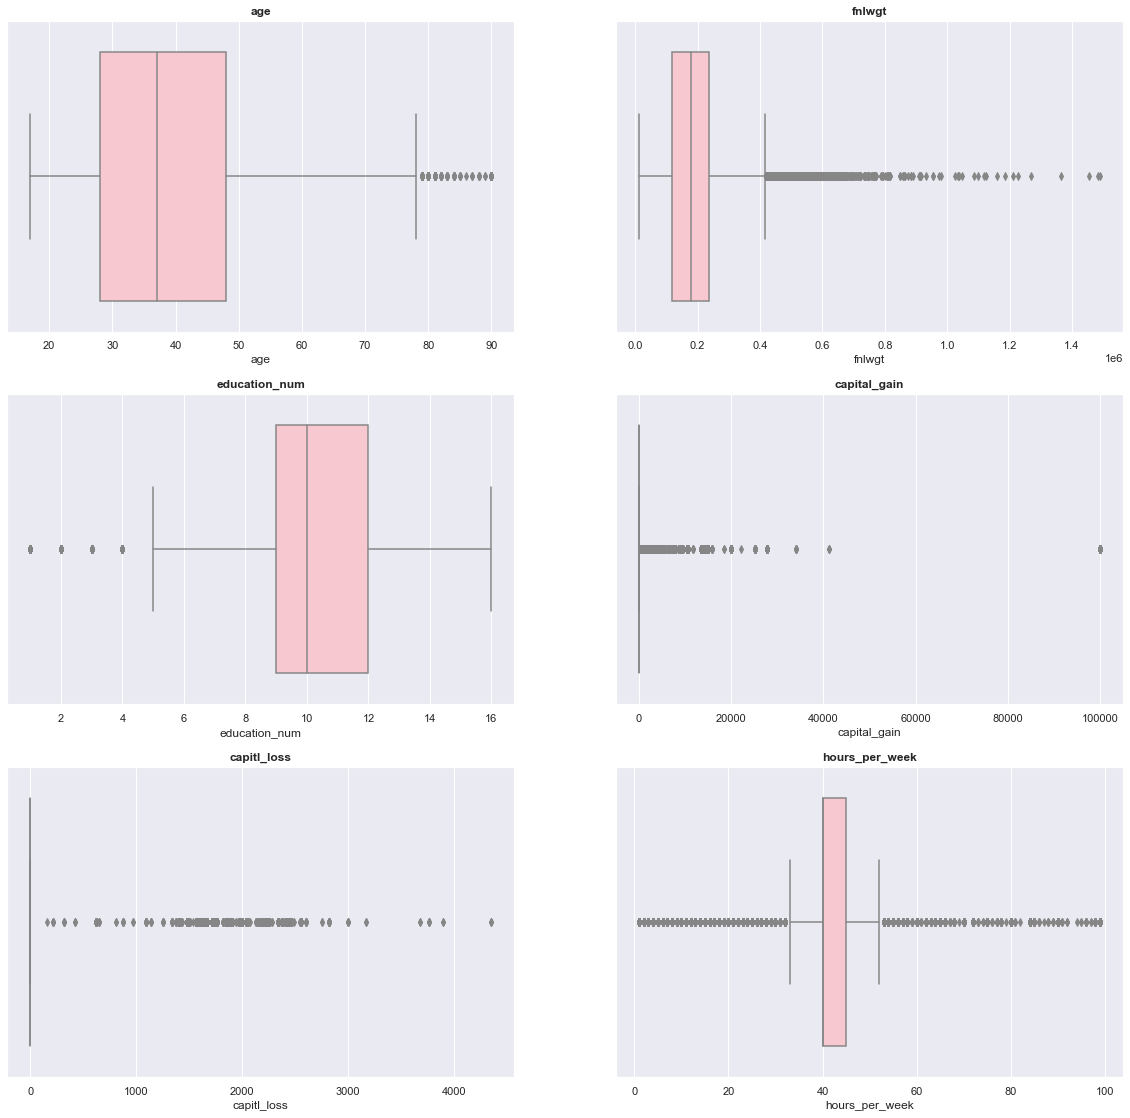

In [36]:
### Checking outliers in numerical features

plt.figure(figsize=(20,40))
for i in enumerate(num):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=i[1], color='pink')
    plt.title("{}".format(i[1]), fontweight="bold")

# Top 10 and Bottom 10 Count of Records

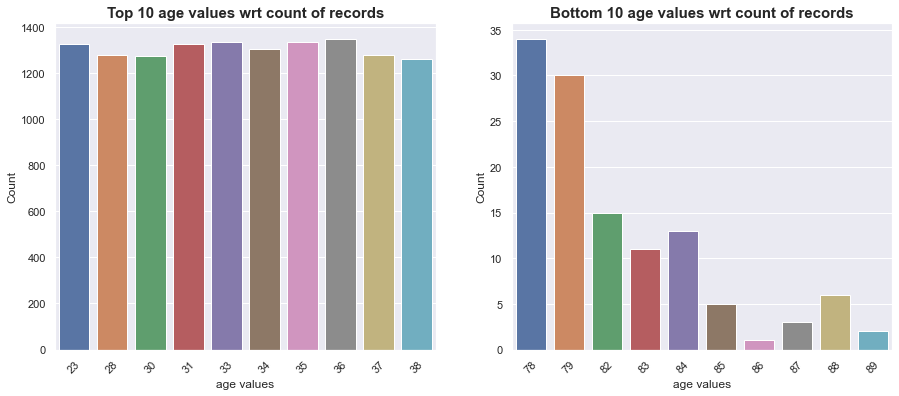

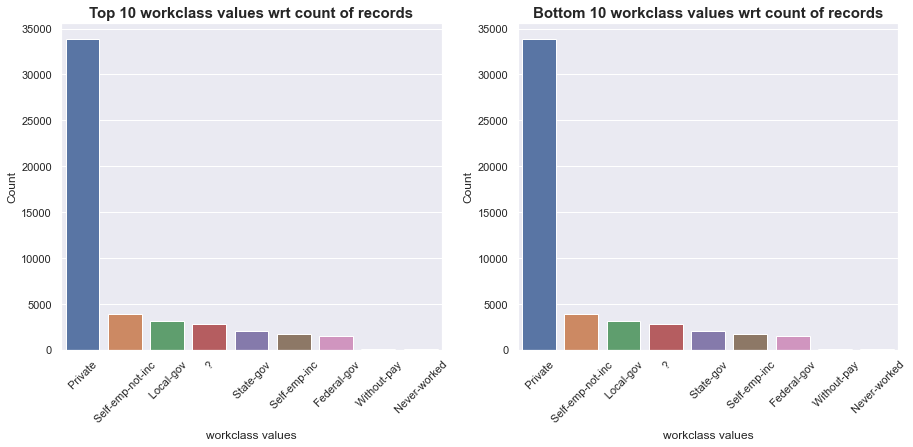

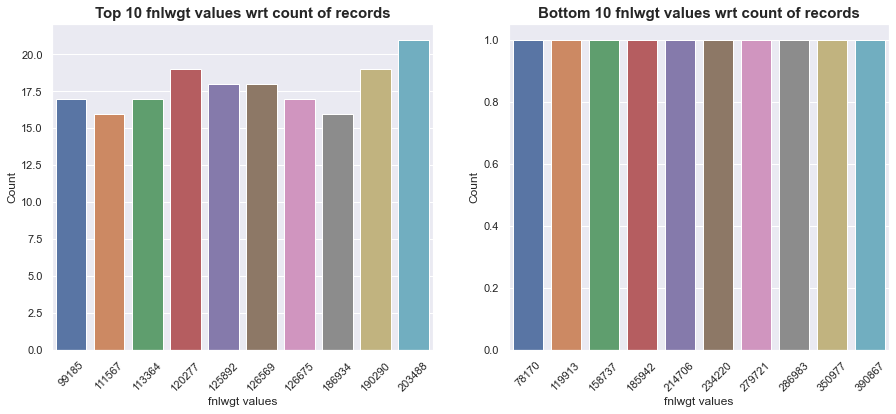

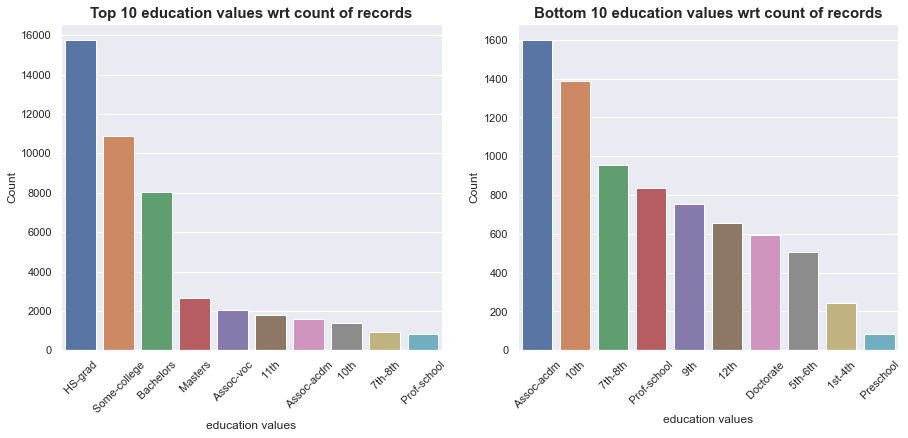

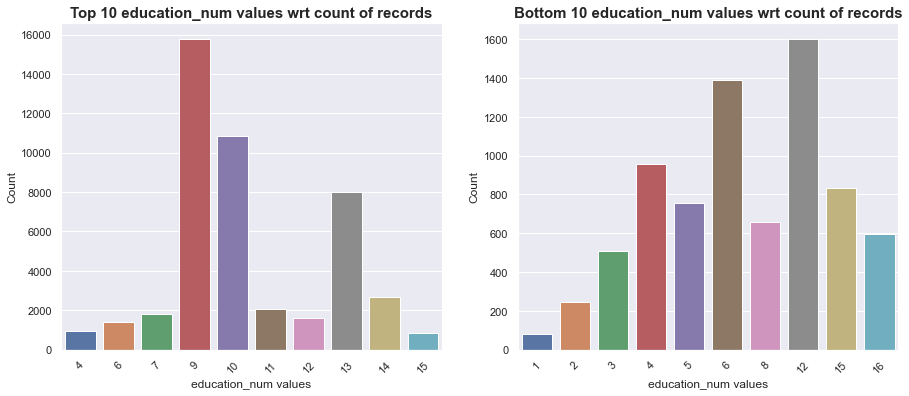

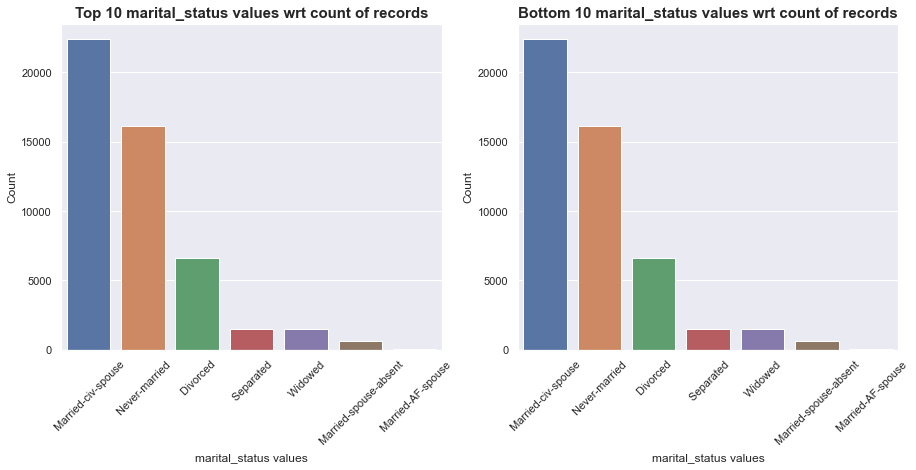

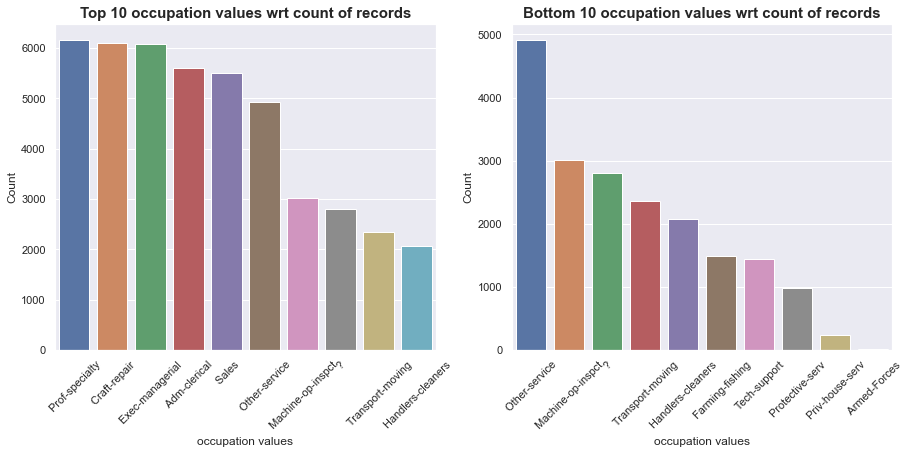

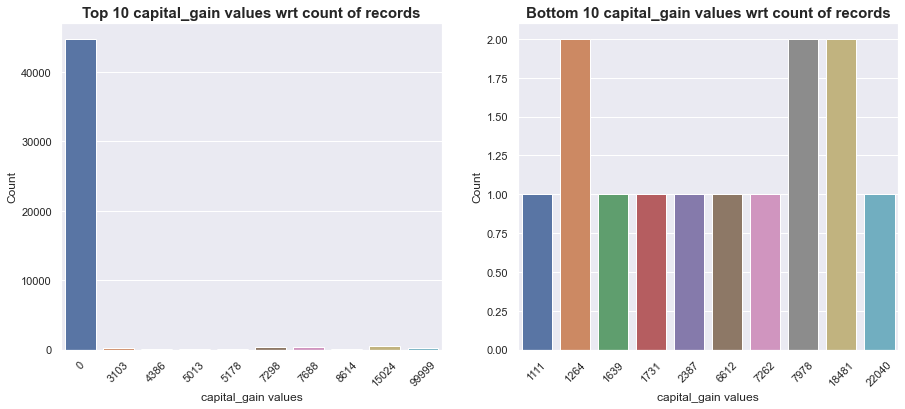

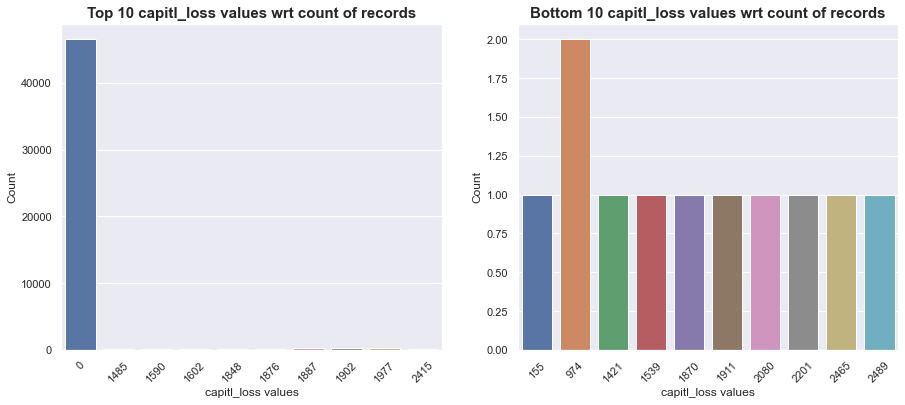

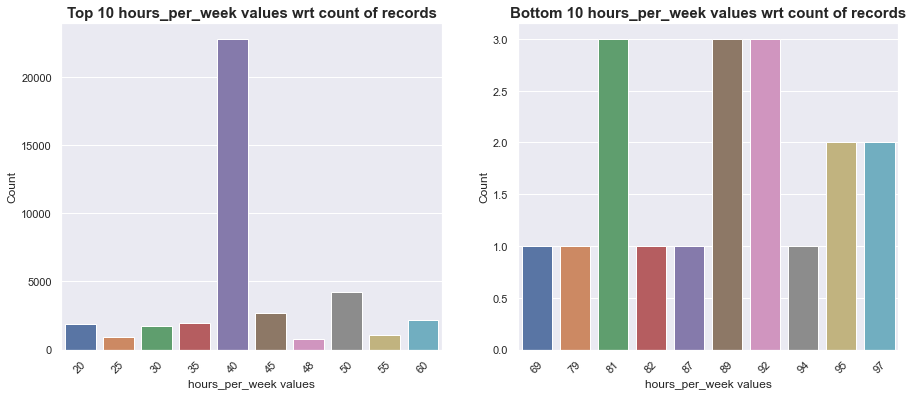

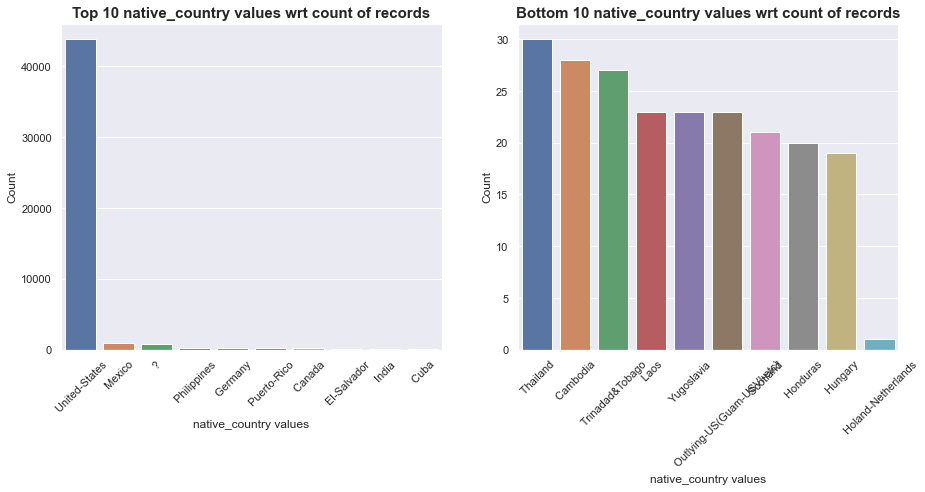

In [37]:
for feature in [feature for feature in dataset.columns if feature not in ['salary', 'relationship', 'race', 'sex']]:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=dataset[feature].value_counts()[:10], x=dataset[feature].value_counts().index[:10])
    plt.ylabel('Count')
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("Top 10 {} values wrt count of records".format(feature),fontsize=15, fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(y=dataset[feature].value_counts()[-10:], x=dataset[feature].value_counts().index[-10:])
    plt.ylabel('Count')
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("Bottom 10 {} values wrt count of records".format(feature),fontsize=15, fontweight='bold')
    plt.show()

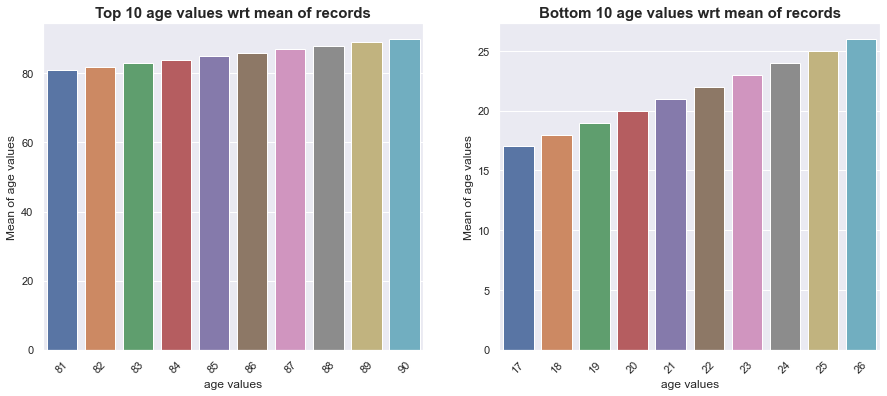

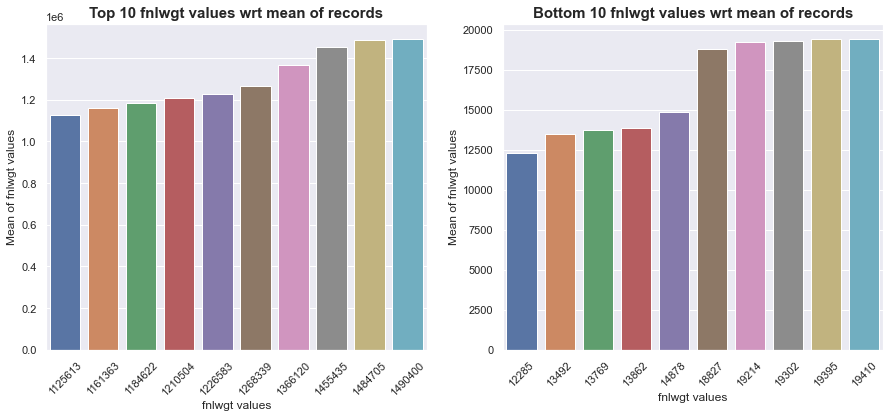

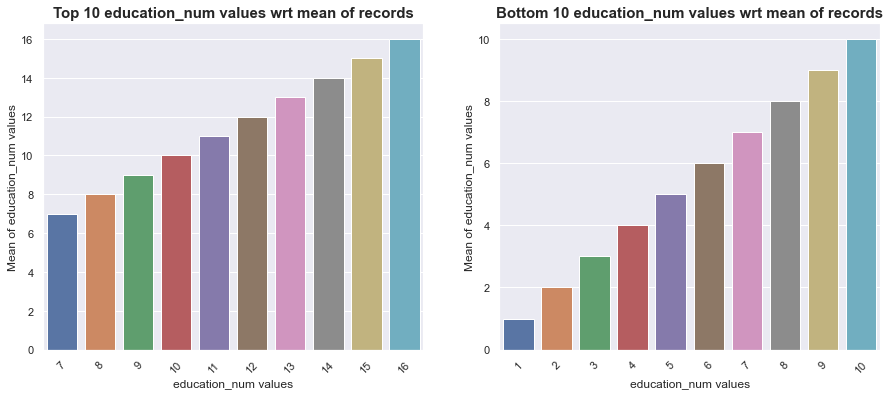

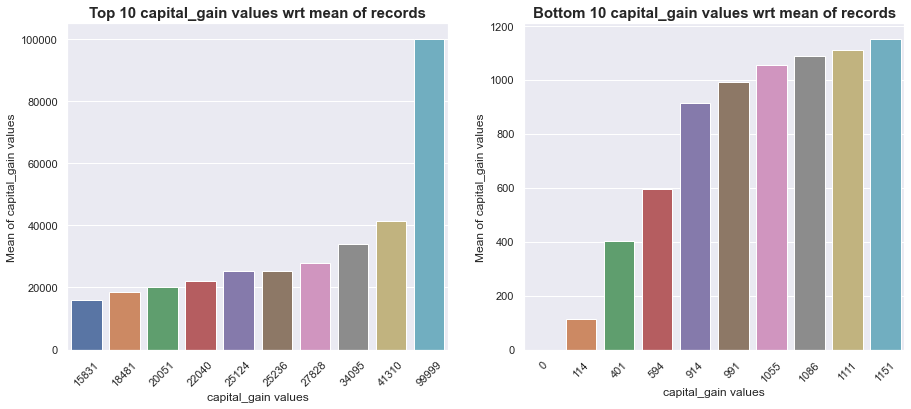

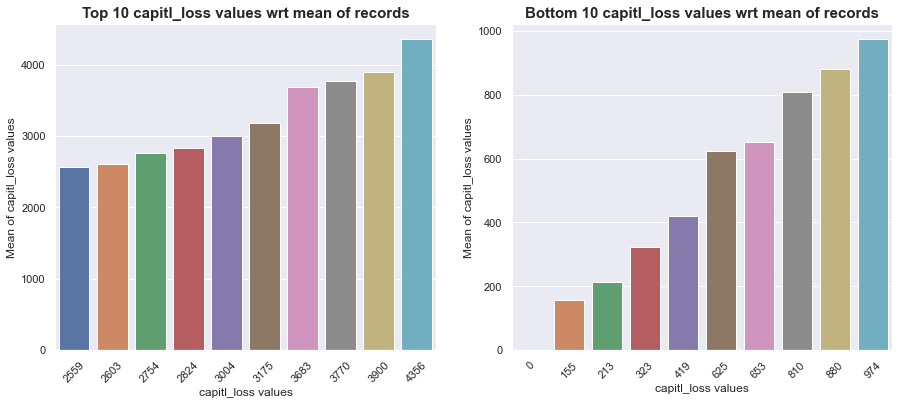

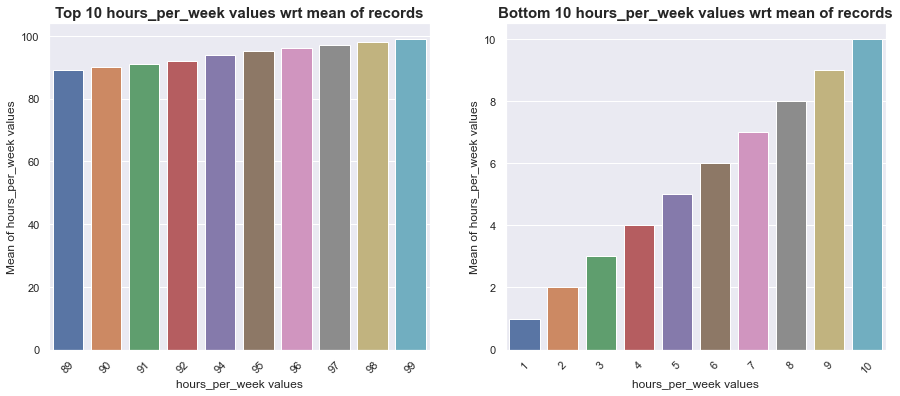

In [38]:
for feature in num:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=dataset.groupby(feature)[feature].mean().sort_values(ascending=False)[:10],
            x=dataset.groupby(feature)[feature].mean().sort_values(ascending=False).index[:10])
    plt.ylabel('Mean of {} values'.format(feature))
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("Top 10 {} values wrt mean of records".format(feature),fontsize=15, fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(y=dataset.groupby(feature)[feature].mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby(feature)[feature].mean().sort_values(ascending=False).index[-10:])
    plt.ylabel('Mean of {} values'.format(feature))
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("Bottom 10 {} values wrt mean of records".format(feature),fontsize=15, fontweight='bold')
    plt.show();

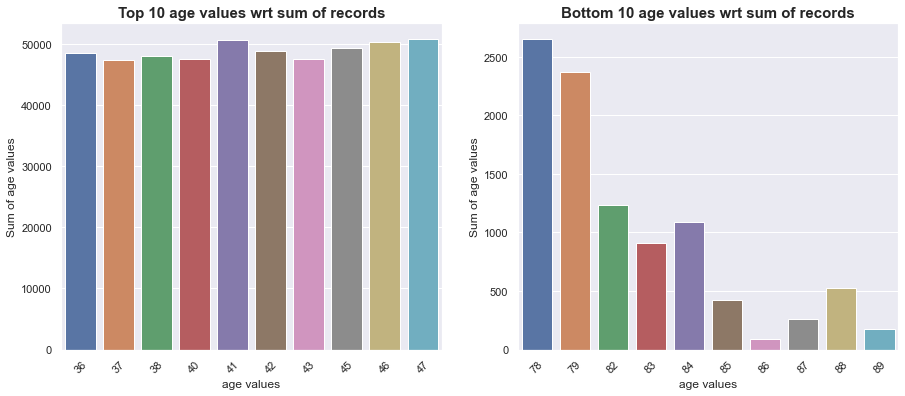

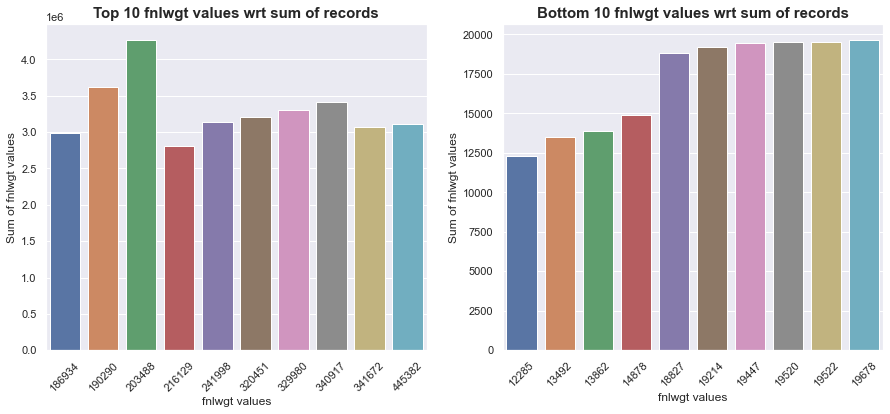

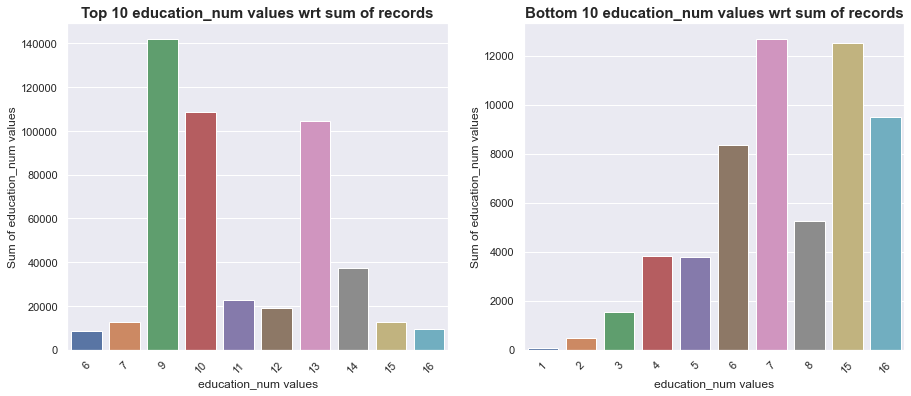

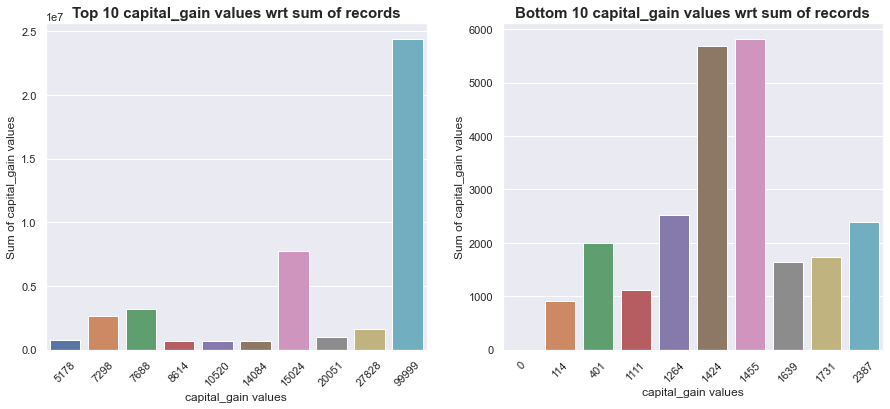

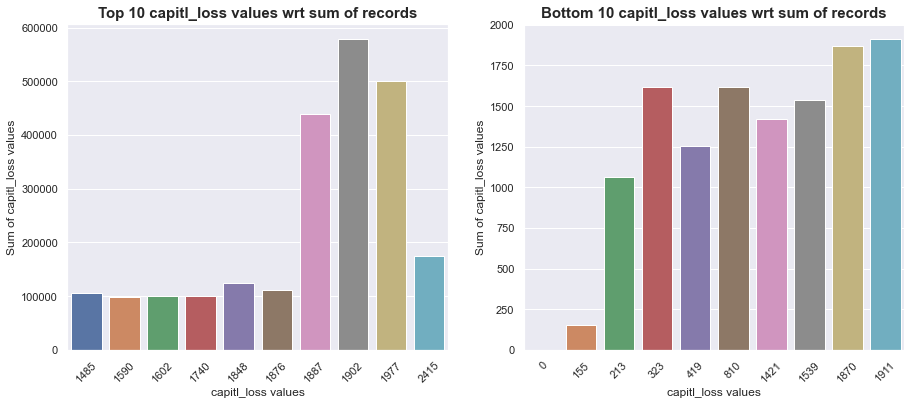

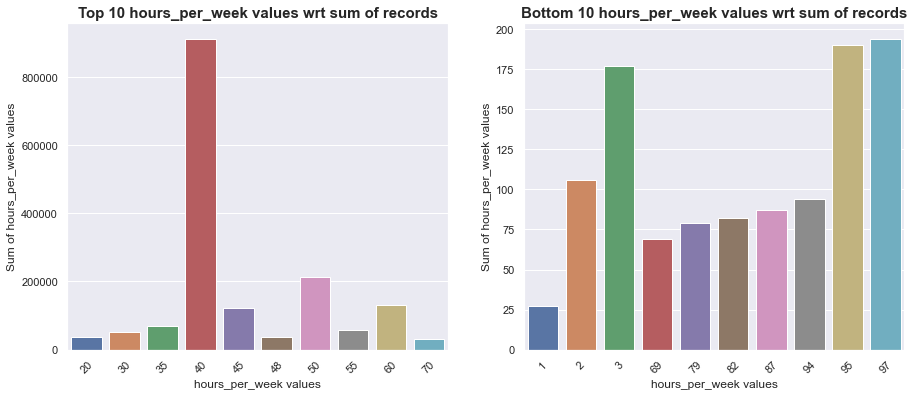

In [39]:
for feature in num:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(y=dataset.groupby(feature)[feature].sum().sort_values(ascending=False)[:10],
            x=dataset.groupby(feature)[feature].sum().sort_values(ascending=False).index[:10])
    plt.ylabel('Sum of {} values'.format(feature))
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("Top 10 {} values wrt sum of records".format(feature),fontsize=15, fontweight='bold')
    
    plt.subplot(122)
    sns.barplot(y=dataset.groupby(feature)[feature].sum().sort_values(ascending=False)[-10:],
            x=dataset.groupby(feature)[feature].sum().sort_values(ascending=False).index[-10:])
    plt.ylabel('Sum of {} values'.format(feature))
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("Bottom 10 {} values wrt sum of records".format(feature),fontsize=15, fontweight='bold')
    plt.show()

# Data Cleaning Continued

In [40]:
### Cleaning values in categorical features
for feature in cat:
    print("Feature {}\n{}".format(feature, dataset[feature].unique()))

Feature workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Feature education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Feature marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Feature occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Feature relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Feature race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Feature sex
[' Male' ' Female']
Featur

In [41]:
### creating function to clean columns
def feature_cleaner_custom(in_dataset, in_feature_list):
    for feature in in_feature_list:
        in_dataset[feature]=in_dataset[feature].str.replace(' ','')
        in_dataset[feature]=in_dataset[feature].str.replace('-','_')
    return in_dataset

In [42]:
### cleaning values in features
dataset=feature_cleaner_custom(dataset, cat)

In [44]:
### replacing ? with nan values
dataset.replace('?',np.nan, inplace=True)

In [45]:
### checking cleaned feature values
for feature in cat:
    print("Feature {}\n{}".format(feature, dataset[feature].unique()))

Feature workclass
['State_gov' 'Self_emp_not_inc' 'Private' 'Federal_gov' 'Local_gov' nan
 'Self_emp_inc' 'Without_pay' 'Never_worked']
Feature education
['Bachelors' 'HS_grad' '11th' 'Masters' '9th' 'Some_college' 'Assoc_acdm'
 'Assoc_voc' '7th_8th' 'Doctorate' 'Prof_school' '5th_6th' '10th'
 '1st_4th' 'Preschool' '12th']
Feature marital_status
['Never_married' 'Married_civ_spouse' 'Divorced' 'Married_spouse_absent'
 'Separated' 'Married_AF_spouse' 'Widowed']
Feature occupation
['Adm_clerical' 'Exec_managerial' 'Handlers_cleaners' 'Prof_specialty'
 'Other_service' 'Sales' 'Craft_repair' 'Transport_moving'
 'Farming_fishing' 'Machine_op_inspct' 'Tech_support' nan
 'Protective_serv' 'Armed_Forces' 'Priv_house_serv']
Feature relationship
['Not_in_family' 'Husband' 'Wife' 'Own_child' 'Unmarried' 'Other_relative']
Feature race
['White' 'Black' 'Asian_Pac_Islander' 'Amer_Indian_Eskimo' 'Other']
Feature sex
['Male' 'Female']
Feature native_country
['United_States' 'Cuba' 'Jamaica' 'India' na

In [46]:
### checking null values in dataset
dataset.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capitl_loss          0
hours_per_week       0
native_country     856
salary               0
dtype: int64

In [49]:
### custom nan replace function
def custom_cat_nan_replace(in_data, in_feature_list):
    for feature in in_feature_list:
        value=in_data[feature].mode()[0]
        in_data[feature]=in_data[feature].fillna(value)
    return in_data

In [50]:
### replacing nan values in categorical features
missing_value_cat=['workclass', 'occupation', 'native_country']

dataset=custom_cat_nan_replace(dataset, missing_value_cat )

In [51]:
### checking null values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capitl_loss       0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [52]:
### checking numerical features
for feature in num:
    print("Feature {}\n{}".format(feature, dataset[feature].unique()))

Feature age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Feature fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
Feature education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Feature capital_gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1

In [53]:
### Getting categories percentage in each features
for feature in cat:
    print(dataset[feature].value_counts()/dataset.shape[0]*100)

Private             75.139819
Self_emp_not_inc     7.909778
Local_gov            6.424518
State_gov            4.058345
Self_emp_inc         3.470387
Federal_gov          2.933645
Without_pay          0.043021
Never_worked         0.020486
Name: workclass, dtype: float64
HS_grad         32.321308
Some_college    22.266609
Bachelors       16.430049
Masters          5.441173
Assoc_voc        4.220187
11th             3.712126
Assoc_acdm       3.279864
10th             2.845553
7th_8th          1.954397
Prof_school      1.708561
9th              1.548768
12th             1.343904
Doctorate        1.216889
5th_6th          1.040706
1st_4th          0.501915
Preschool        0.167988
Name: education, dtype: float64
Married_civ_spouse       45.832053
Never_married            32.978920
Divorced                 13.582447
Separated                 3.134411
Widowed                   3.109827
Married_spouse_absent     1.286543
Married_AF_spouse         0.075799
Name: marital_status, dtype: float6

In [54]:
### Clubbing rare categories in custom Other category using less than 10 percent of record threshold
for feature in cat:    
    frequency=dataset[feature].value_counts(normalize=True)
    mapping=dataset[feature].map(frequency)
    dataset[feature]=dataset[feature].mask(mapping<0.1, 'other')

In [55]:
### Again checking categories percentage in each features
for feature in cat:
    print(dataset[feature].value_counts()/dataset.shape[0]*100)

Private    75.139819
other      24.860181
Name: workclass, dtype: float64
HS_grad         32.321308
other           28.982033
Some_college    22.266609
Bachelors       16.430049
Name: education, dtype: float64
Married_civ_spouse    45.832053
Never_married         32.978920
Divorced              13.582447
other                  7.606580
Name: marital_status, dtype: float64
other              23.794891
Prof_specialty     18.388544
Craft_repair       12.511011
Exec_managerial    12.463893
Adm_clerical       11.488743
Sales              11.275685
Other_service      10.077234
Name: occupation, dtype: float64
Husband          40.376539
Not_in_family    25.745191
Own_child        15.520456
Unmarried        10.497204
other             7.860611
Name: relationship, dtype: float64
White    85.501813
other    14.498187
Name: race, dtype: float64
Male      66.848995
Female    33.151005
Name: sex, dtype: float64
United_States    91.504312
other             8.495688
Name: native_country, dtype: float

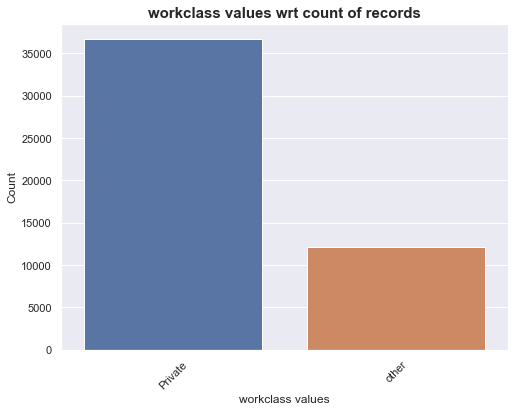

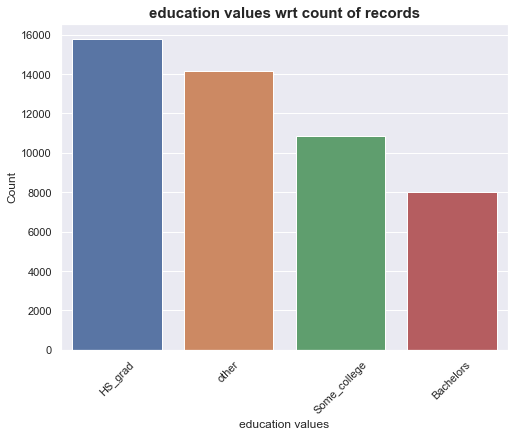

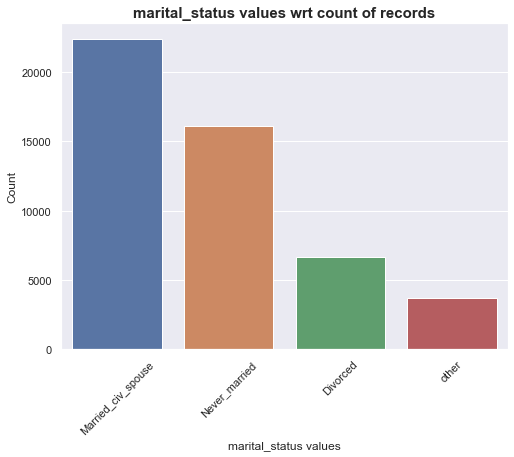

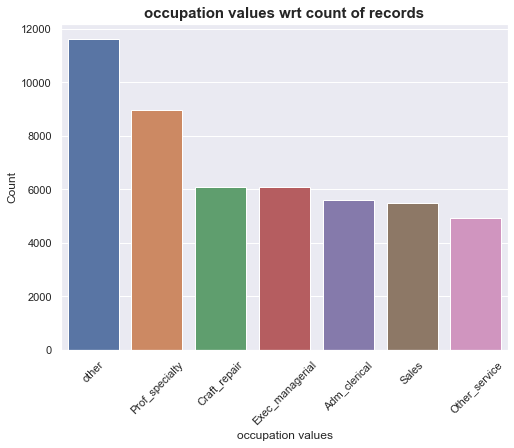

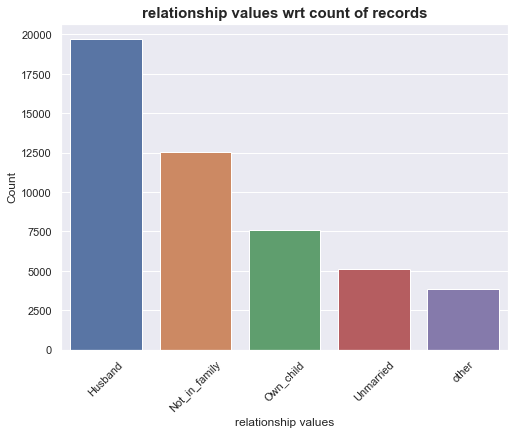

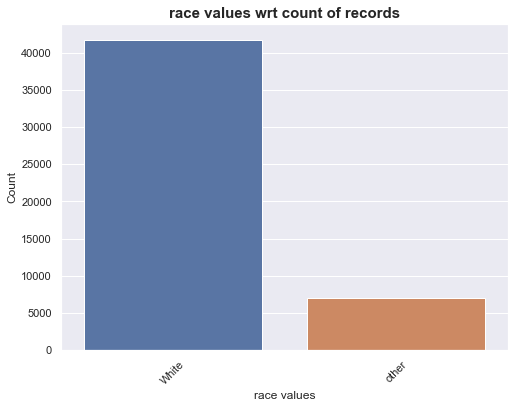

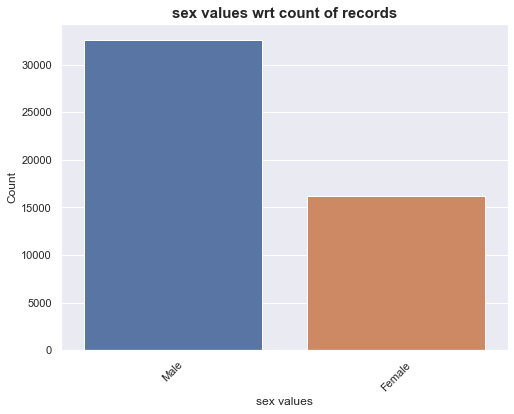

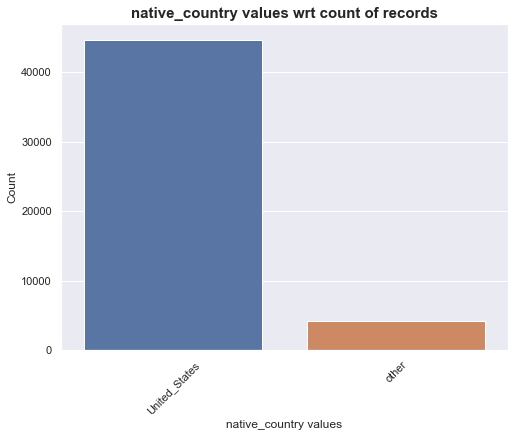

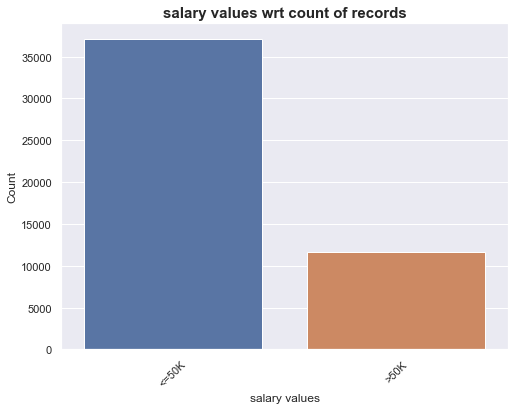

In [56]:
for feature in cat:
    plt.figure(figsize=(8,6))
    sns.barplot(y=dataset[feature].value_counts(), x=dataset[feature].value_counts().index)
    plt.ylabel('Count')
    plt.xlabel('{} values'.format(feature))
    plt.xticks(rotation=45)
    plt.title("{} values wrt count of records".format(feature),fontsize=15, fontweight='bold')

# Encoding Dependent feature

In [57]:
dataset['salary']=dataset['salary'].replace('<=50K','0')
dataset['salary']=dataset['salary'].replace('>50K','1')
dataset['salary']=dataset['salary'].astype('int64')

# Correlation and HeatMap

In [58]:
corr=dataset.corr()
corr

,age,fnlwgt,education_num,capital_gain,capitl_loss,hours_per_week,salary
age,1.000000,-0.076474,0.030760,0.077221,0.056908,0.071322,0.230335
fnlwgt,-0.076474,1.000000,-0.038798,-0.003713,-0.004375,-0.013516,-0.006376
education_num,0.030760,-0.038798,1.000000,0.125186,0.080969,0.143872,0.332746
capital_gain,0.077221,-0.003713,0.125186,1.000000,-0.031460,0.082154,0.223014
capitl_loss,0.056908,-0.004375,0.080969,-0.031460,1.000000,0.054440,0.147527
hours_per_week,0.071322,-0.013516,0.143872,0.082154,0.054440,1.000000,0.227649
salary,0.230335,-0.006376,0.332746,0.223014,0.147527,0.227649,1.000000


<AxesSubplot:>

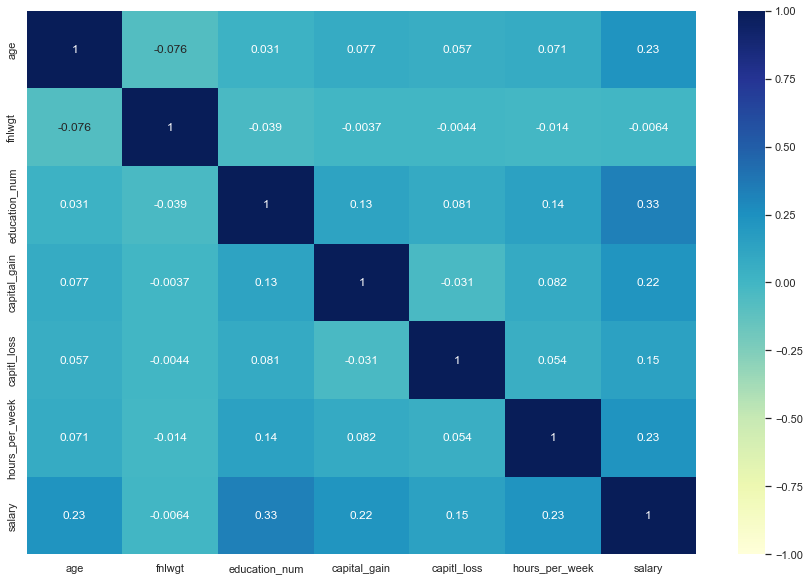

In [59]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")